In [1]:
pip install scipy==1.1.0

     |████████████████████████████████| 31.2 MB 263 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.4 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
plotnine 0.6.0 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
jax 0.2.25 requires scipy>=1.2.1, but you have scipy 1.1.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import os
from glob import glob
import itertools
import fnmatch
import random
import matplotlib.pylab as plt
import seaborn as sns
import cv2
from scipy.misc import imresize, imread


In [3]:
import os
import os, os.path
os.environ['KAGGLE_USERNAME']="mohameddany"
os.environ['KAGGLE_Key']="179b1b409a9994b74b3b6351cbd6c7a4"
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

100% 3.10G/3.10G [00:50<00:00, 19.5MB/s]
100% 3.10G/3.10G [00:50<00:00, 65.7MB/s]


In [4]:
from zipfile import ZipFile

file_name="/content/breast-histopathology-images.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('extracted')

extracted


In [5]:
imagePatches = glob('/content/IDC_regular_ps50_idx5/**/*.png', recursive=True)
for filename in imagePatches[0:10]:
    print(filename)
print(len(imagePatches))

/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x801_y1451_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x1851_y451_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x601_y2251_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x2101_y2551_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x2351_y701_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x1651_y2601_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x1701_y351_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x1201_y551_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x551_y501_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x2851_y1601_class0.png
277524


(-0.5, 49.5, 49.5, -0.5)

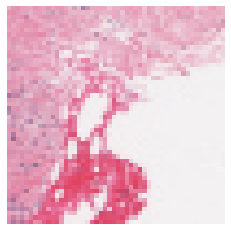

In [6]:
image = cv2.imread("IDC_regular_ps50_idx5/9135/1/9135_idx5_x1701_y1851_class1.png")
image = cv2.resize(image, (50,50))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

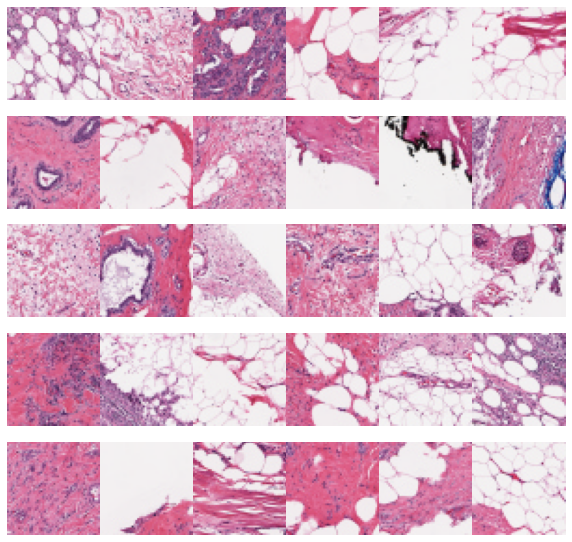

In [7]:
Sample = imagePatches
i = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in Sample[100:130]:
    im = cv2.imread(l)
    im = cv2.resize(im, (50, 50)) 
    plt.subplot(5, 6, i+1)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    i+= 1

In [8]:
zero = '*class0.png'
One = '*class1.png'
zero = fnmatch.filter(imagePatches, zero)
One = fnmatch.filter(imagePatches, One)
print("IDC(-)\n\n",zero[0:10],'\n')
print("IDC(+)\n\n",One[0:10])

IDC(-)

 ['/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x801_y1451_class0.png', '/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x1851_y451_class0.png', '/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x601_y2251_class0.png', '/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x2101_y2551_class0.png', '/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x2351_y701_class0.png', '/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x1651_y2601_class0.png', '/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x1701_y351_class0.png', '/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x1201_y551_class0.png', '/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x551_y501_class0.png', '/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x2851_y1601_class0.png'] 

IDC(+)

 ['/content/IDC_regular_ps50_idx5/10308/1/10308_idx5_x1451_y901_class1.png', '/content/IDC_regular_ps50_idx5/10308/1/10308_idx5_x1851_y1101_class1.png', '/content/IDC_regular_ps50_idx5/10308/1/10308_idx5_x1851_y1301_class1.png',

In [9]:
def proc_images(start,end):
    x = []
    y = []
    for img in imagePatches[start:end]:
        full_size_image = cv2.imread(img)
        gray = cv2.cvtColor(full_size_image, cv2.COLOR_BGR2RGB)
        x.append(cv2.resize(gray, (50,50), interpolation=cv2.INTER_CUBIC))
        if img in zero:
            y.append(0)
        elif img in One:
            y.append(1)
    return x,y

In [10]:
X,Y = proc_images(0,30000)
df = pd.DataFrame()
df["images"]=X
df["labels"]=Y
X2=df["images"]
Y2=df["labels"]
X2=np.array(X2)
imgs0=[]
imgs1=[]
imgs0 = X2[Y2==0]
imgs1 = X2[Y2==1] 


In [11]:
X=np.array(X)

In [12]:
X.shape

(30000, 50, 50, 3)

In [13]:
print("Total number of IDC(-):",df["labels"].value_counts()[0])
print("Totla number of IDC(+):",df["labels"].value_counts()[1])
print("Total number of images :",df["images"].count())
print(type(df["images"].count()))
print('precentage of Negative images:',np.mean(df["labels"]==0)*100,"%")
print('precentage of Positive images: ', np.mean(df["labels"]==1)*100,"%")
print("image shape : ", df["images"][0].shape)

Total number of IDC(-): 22352
Totla number of IDC(+): 7648
Total number of images : 30000
<class 'numpy.int64'>
precentage of Negative images: 74.50666666666666 %
precentage of Positive images:  25.493333333333336 %
image shape :  (50, 50, 3)


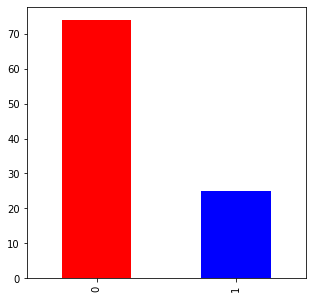

0    74
1    25
dtype: int64


In [14]:
x =int((np.mean(df["labels"]==0)*100))
y=int((np.mean(df["labels"]==1)*100))
s = pd.Series((x,y))
plt.figure(figsize=(5,5))
s.plot.bar(color=["red","blue"])
plt.show()
print(s)

In [15]:
df.head(20)

,images,labels
0,"[[[190, 116, 160], [203, 126, 165], [152, 85, ...",0
1,"[[[108, 63, 122], [97, 56, 117], [89, 51, 108]...",0
2,"[[[244, 243, 243], [244, 243, 243], [244, 243,...",0
3,"[[[243, 241, 242], [239, 241, 242], [243, 238,...",0
4,"[[[225, 123, 160], [220, 123, 163], [217, 111,...",0
5,"[[[237, 239, 239], [242, 236, 237], [243, 239,...",0
6,"[[[106, 62, 119], [103, 58, 116], [150, 86, 14...",0
7,"[[[188, 81, 126], [208, 118, 150], [205, 145, ...",0
8,"[[[232, 205, 219], [241, 234, 238], [241, 240,...",0
9,"[[[242, 233, 236], [223, 163, 193], [194, 100,...",0


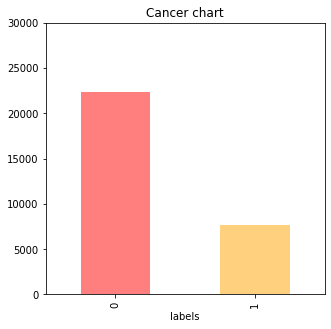

In [16]:
df.groupby(['labels'])['images'].count().plot( figsize=(5,5), kind="bar", color=["red","orange"],alpha =0.5)
plt.ylim([0,30000])
plt.title("Cancer chart")
plt.show()

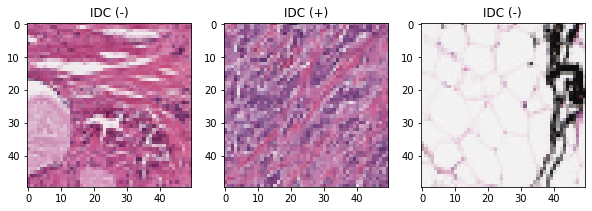

In [17]:
plt.subplot(1,3,1)
plt.title('IDC (-)')

plt.imshow(imgs0[0])
plt.subplot(1,3,2)
plt.title('IDC (+)')
plt.imshow(imgs1[1])
plt.subplot(1,3,3)
plt.title("IDC (-)")
plt.imshow(imgs0[3]) 

In [18]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical


In [19]:
X=np.array(X)
X=X/255.0

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24000, 50, 50, 3) (6000, 50, 50, 3) (24000, 2) (6000, 2)


In [21]:
def feature_extractor(dataset):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):  
        df = pd.DataFrame()  
        input_img = x_train[image, :,:,:]
        img = input_img

         
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values 
        
        num = 1  
        kernels = []
        for theta in range(2):   
            theta = theta / 4. * np.pi
            for sigma in (1, 3): 
                lamda = np.pi/4
                gamma = 0.5
                gabor_label = 'Gabor' + str(num)  
   
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img 
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma, "iteration=",image)
                num += 1  
        
        image_dataset = image_dataset.append(df)
        
    return image_dataset

In [22]:
fear=feature_extractor(X_train[:5000])

Streaming output truncated to the last 5000 lines.
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5 iteration= 3750
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5 iteration= 3750
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5 iteration= 3750
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5 iteration= 3750
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5 iteration= 3751
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5 iteration= 3751
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5 iteration= 3751
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5 iteration= 3751
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5 iteration= 3752
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5 iteration= 3752
Gabor3 : 

In [158]:
featured_img = np.expand_dims(X_for_RF, axis=0)

In [214]:
featured_img[0].shape

(5000, 37500)

In [37]:
fea.shape

(1, 22920, 5)

In [23]:
fear.shape

(37500000, 5)

In [25]:
n_features = fear.shape[1]

In [26]:
n_features

5

In [27]:
fearr = np.expand_dims(fear, axis=0)

In [38]:
fearr.shape

(1, 37500000, 5)

In [29]:
X_train.shape[0]

24000

In [39]:
new=X_train[:5000]

In [40]:
new.shape

(5000, 50, 50, 3)

In [36]:
X_train[:5000].shape[0]

5000

In [284]:
X_for_RF.shape

(5000, 37500)

In [41]:
X_for_RF = np.reshape(fearr, (new.shape[0], -1))

In [31]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [67]:
X_for_RF.shape

(5000, 37500)

In [59]:
yy=y_train[:5000]
yy

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [63]:
type(X_for_RF[3750])

numpy.ndarray

In [45]:
RF_model.fit(X_for_RF, yy)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
test_features = feature_extractor(X_test[:1000])

In [69]:
new_test=X_test[:1000]

In [70]:

test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (new_test.shape[0], -1))

In [71]:
test_for_RF.shape

(1000, 37500)

### Random Forest classifier




In [72]:
test_prediction = RF_model.predict(test_for_RF)

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Random Forest Accuracy =  86.8 % 

In [249]:
print ("Accuracy = ", accuracy_score(y_test[:1000], test_prediction)*100,"%")
RF=accuracy_score(y_test[:1000], test_prediction)

Accuracy =  86.8 %


In [96]:
y_teest1=y_test[:1000]

In [99]:
cm = confusion_matrix(np.asarray(y_teest1).argmax(axis=1), np.asarray(test_prediction).argmax(axis=1))

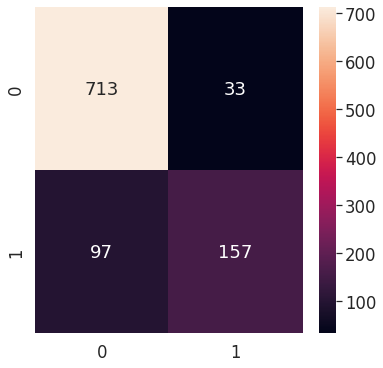

In [113]:
fig, ax = plt.subplots(figsize=(6,6))    
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

In [190]:
a_del = yy

### **Support** Vector machine 


In [193]:
a_del=np.argmax(a_del, axis=1)

In [194]:
a_del[:100]

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [195]:

svc = svm.SVC(kernel='linear', C=1,gamma="auto").fit(X_for_RF, a_del)

In [198]:
y_pred= svc.predict(test_for_RF)  

In [209]:
print(y_pred.shape)
print(y_teest1.shape)
#y_teest1=np.argmax(y_teest1, axis=1)

(1000,)
(1000,)


## Accuracy of SVM =  79.7%

In [245]:
print("Accuracy of SVM = ",accuracy_score(y_teest1, y_pred)*100,"%")
sv=accuracy_score(y_teest1, y_pred)

Accuracy of SVM =  79.7 %


***Logistic*** regression


In [218]:
from sklearn.linear_model import LogisticRegression 

In [222]:
model =LogisticRegression()
model.fit(X_for_RF, a_del)
predicted_classes = model.predict(test_for_RF)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Logistic Regression Accuracy
# 80.80000000000001 %

In [246]:
print(accuracy_score(y_teest1, predicted_classes)*100,"%")
LR=accuracy_score(y_teest1, predicted_classes)

80.80000000000001 %


In [239]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
 
knn.fit(X_for_RF, a_del)


KNeighborsClassifier(n_neighbors=2)

In [240]:
pre=knn.predict(test_for_RF)

In [241]:
pre.shape

(1000,)

In [242]:
test_for_RF.shape

(1000, 37500)

In [278]:
print("Knn acuracy score = ",accuracy_score(y_teest1, pre)*100,"%")
KNNS=accuracy_score(y_teest1, pre)

Knn acuracy score =  83.7 %


In [279]:
cm = confusion_matrix(y_teest1,pre)

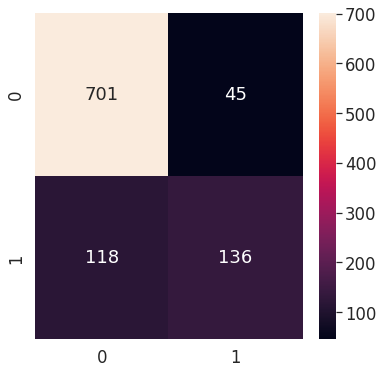

In [280]:
fig, ax = plt.subplots(figsize=(6,6))    
sns.heatmap(cm, annot=True, fmt='g', ax=ax);


In [281]:
print("KNN TEST SCORE =",kknscore)
print("RF TEST SCORE =",RF)
print("LR TEST SCORE =",LR)
print("SVM TEST SCORE =",sv)



KNN TEST SCORE = 0.837
RF TEST SCORE = 0.868
LR TEST SCORE = 0.808
SVM TEST SCORE = 0.797
